## Handwritten Digit Recognization using Neural Networks

In this notebook we will be classifying handwritten digits using a Neural Network with hidden layers.

In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


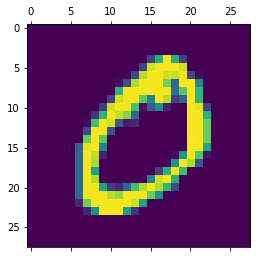

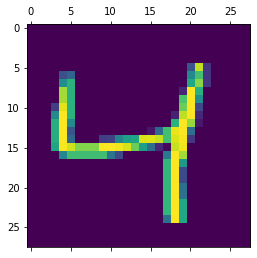

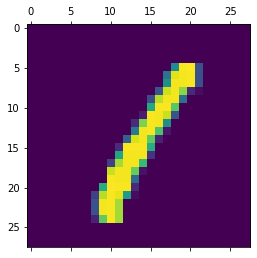

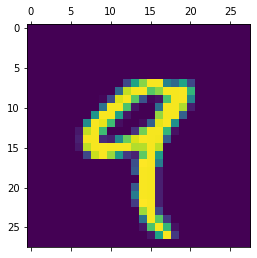

In [6]:
for i in range(1,5):
    plt.matshow(X_train[i])

<br>
We will now scale the data as it will give us higher accuracy on training and test data set.

In [8]:
X_train = X_train/255
X_test  = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 901us/step - loss: 0.2648 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.1245 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.0862 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.0663 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.0515 - accuracy: 0.9845


In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 711us/step - loss: 0.0757 - accuracy: 0.9767


[0.0756932944059372, 0.9767000079154968]

<br>

From this we can see that a 97% accuracy is obtained on the test set.


In [25]:
#np.argmax to find index of closest association to digit
y_predicted = model.predict(X_test)
y_predicted_label = [np.argmax(i) for i in y_predicted ]

In [26]:
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)

<function matplotlib.pyplot.show(close=None, block=None)>

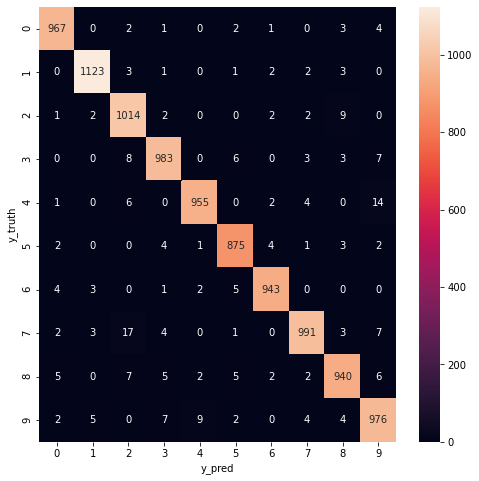

In [32]:
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('y_pred')
plt.ylabel('y_truth')
plt.show